In [1]:
from tickers.data_processing import update_ticker_data, batch_update_tickers_parallel, get_sp500_metadata
from tickers.consts import DATA_DIR
from tickers.signals import *

In [2]:
data_dict = dict()
for t in ["SPY", "QQQ", "IWM"]:
    data_dict[t] = update_ticker_data(t)

In [3]:
def plot_candlestick(df: pd.DataFrame, title: str = "Candlestick Chart", start: int = 0, end: int = None, signal: pd.Series = None):
    import matplotlib.patches as mpatches

    df = df.copy()
    df["Date"] = pd.to_datetime(df["Date"] if "Date" in df.columns else df.index)
    if end is None:
        end = len(df)
    df = df.iloc[start:end].reset_index(drop=True)
    signal = signal.iloc[start:end].reset_index(drop=True) if signal is not None else None

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, row in df.iterrows():
        x = i  # use integer x-axis to avoid weekend gaps
        open_, close, high, low = row['Open'], row['Close'], row['High'], row['Low']
        color = 'green' if close >= open_ else 'red'
        edgecolor = color
        fill = False if close >= open_ else True

        # Wick (tail) behind candle
        ax.plot([x, x], [low, high], color='black', linewidth=0.5, zorder=1)

        # Body (hollow or filled)
        rect = mpatches.Rectangle(
            (x - 0.4, min(open_, close)),
            width=0.8,
            height=abs(close - open_),
            facecolor=color if fill else 'white',
            edgecolor=edgecolor,
            linewidth=1.0,
            zorder=2
        )
        ax.add_patch(rect)

        # Signal marker
        if signal is not None and signal.iloc[i]:
            ax.scatter(x, high + 0.01 * high, marker='^', color='blue', zorder=3)

    ax.set_title(title)
    ax.set_xlabel("Day")
    ax.set_ylabel("Price")
    ax.set_xticks(range(0, len(df), max(1, len(df)//10)))
    ax.set_xticklabels([df['Date'].dt.strftime('%Y-%m-%d')[i] for i in range(0, len(df), max(1, len(df)//10))], rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


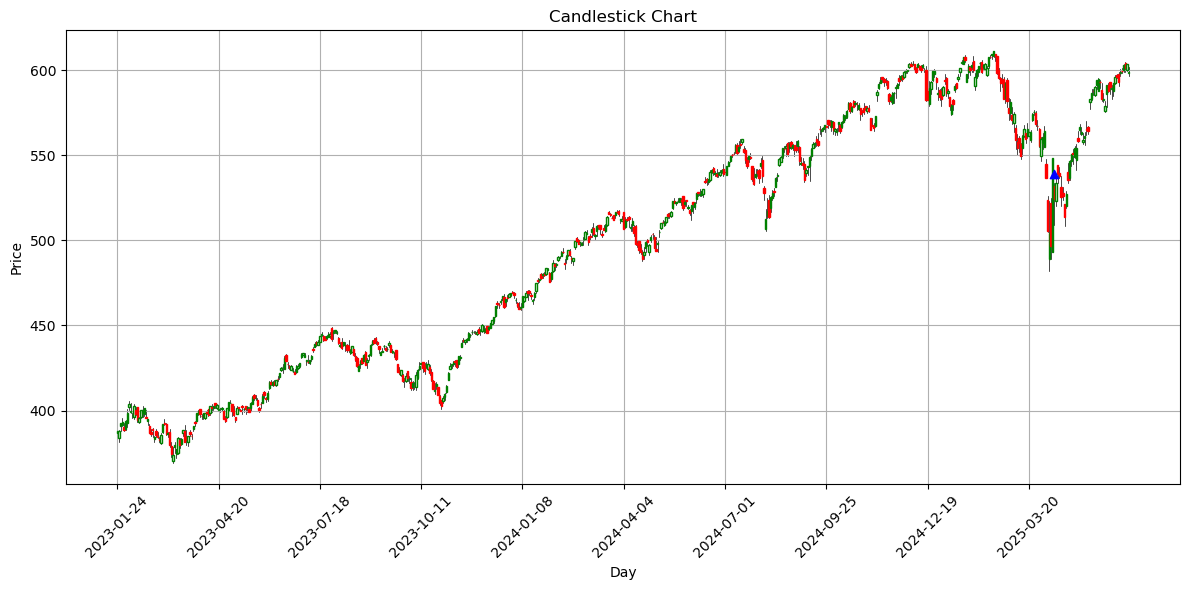

In [5]:
df = data_dict["SPY"].tail(600)
plot_candlestick(df, signal=detect_hammer(df))